In [1]:
# Import the dependencies
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
 

# Use the. citipy module to determine city based on latitude and longtitude
from citipy import citipy

# Import the requests library
import requests

# Import the API key
from config import weather_api_key

# Import the time library and adtetime module from datetim library
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longtitude combinations
lats = np.random.uniform(low = -90.000, high=90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high=180.000,size = 1500)
lat_lngs = zip(lats, lngs)
#lat_lngs

In [3]:
coordinates = list(lat_lngs)
coordinates

[(53.749199382385115, -144.5701983819065),
 (67.62545915747071, 127.72489360832725),
 (-58.469251449828064, -147.47073156824365),
 (-67.7196349208936, 82.27394089199811),
 (52.065023853273516, 160.821277663081),
 (-0.038652730493524246, 22.294741126621574),
 (49.45654745856734, 102.40652849356508),
 (-83.0808592045972, 83.72390644136038),
 (38.79688419958575, -55.34172727502424),
 (-35.21983706769319, -146.09541385173978),
 (-3.7996975281252503, 25.78628357888951),
 (35.70104776210232, -0.18120724560455415),
 (-67.19246718227807, 128.4797464255907),
 (-78.57536810599342, -131.04717646365555),
 (-60.96621049846512, 114.38721094111236),
 (70.51769277427283, -147.96122813696826),
 (-71.62159583687358, -46.50949797017148),
 (-7.879143165133769, 11.069430078799826),
 (52.77456034339576, 158.305365996359),
 (38.28280841501038, -39.485162651097625),
 (30.380422519132125, 9.068467781523424),
 (-51.31466069649235, 83.8984360380573),
 (-87.78564249757105, 141.3022549707889),
 (-53.81528493728206

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [5]:
# Build basic URL for the OpenWeatherMap
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [6]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list
        city_data.append({"City": city, 
                           "Lat": city_lat, 
                           "Lng": city_lng,
                           "Max Temp": city_max_temp,
                           "Humidity": city_humidity,
                           "Cloudiness": city_clouds,
                           "Wind Speed": city_wind,
                           "Country": city_country,
                           "Date": city_date})

# If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | batagay-alyta
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 6 of Set 1 | boende
Processing Record 7 of Set 1 | kholtoson
Processing Record 8 of Set 1 | saint-pierre
Processing Record 9 of Set 1 | kindu
Processing Record 10 of Set 1 | wahran
City not found. Skipping...
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | college
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | soyo
Processing Record 17 of Set 1 | yelizovo
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | nalut
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | margate
Processing Record 22 of Set 1 | huasahuasi
Proce

Processing Record 39 of Set 4 | san clemente
Processing Record 40 of Set 4 | bandarbeyla
Processing Record 41 of Set 4 | cap malheureux
Processing Record 42 of Set 4 | souillac
Processing Record 43 of Set 4 | netarhat
Processing Record 44 of Set 4 | omboue
Processing Record 45 of Set 4 | kungurtug
Processing Record 46 of Set 4 | flinders
Processing Record 47 of Set 4 | arvika
Processing Record 48 of Set 4 | huarmey
Processing Record 49 of Set 4 | port macquarie
Processing Record 50 of Set 4 | vardo
Processing Record 1 of Set 5 | kytlym
City not found. Skipping...
Processing Record 2 of Set 5 | akdepe
Processing Record 3 of Set 5 | luderitz
Processing Record 4 of Set 5 | rabo de peixe
Processing Record 5 of Set 5 | ponta delgada
Processing Record 6 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 7 of Set 5 | ahipara
Processing Record 8 of Set 5 | winnemucca
Processing Record 9 of Set 5 | saint marys
Processing Record 10 of Set 5 | funadhoo
Processing Reco

Processing Record 27 of Set 8 | ladario
Processing Record 28 of Set 8 | longyearbyen
Processing Record 29 of Set 8 | half moon bay
Processing Record 30 of Set 8 | nemuro
Processing Record 31 of Set 8 | fallon
Processing Record 32 of Set 8 | cockburn town
Processing Record 33 of Set 8 | mumford
Processing Record 34 of Set 8 | bathurst
Processing Record 35 of Set 8 | doctor pedro p. pena
City not found. Skipping...
Processing Record 36 of Set 8 | timon
Processing Record 37 of Set 8 | miri
Processing Record 38 of Set 8 | torbat-e jam
Processing Record 39 of Set 8 | agirish
Processing Record 40 of Set 8 | kampong cham
Processing Record 41 of Set 8 | mookane
Processing Record 42 of Set 8 | vares
Processing Record 43 of Set 8 | iberia
Processing Record 44 of Set 8 | vysokopillya
Processing Record 45 of Set 8 | constitucion
Processing Record 46 of Set 8 | pimentel
Processing Record 47 of Set 8 | yavatmal
Processing Record 48 of Set 8 | kalianget
Processing Record 49 of Set 8 | basco
Processin

Processing Record 15 of Set 12 | ambovombe
Processing Record 16 of Set 12 | kutum
Processing Record 17 of Set 12 | san rafael
Processing Record 18 of Set 12 | buldana
Processing Record 19 of Set 12 | port blair
Processing Record 20 of Set 12 | cairns
Processing Record 21 of Set 12 | bosaso
Processing Record 22 of Set 12 | ancud
Processing Record 23 of Set 12 | coahuayana
Processing Record 24 of Set 12 | vostok
Processing Record 25 of Set 12 | zyryanka
Processing Record 26 of Set 12 | tigre
Processing Record 27 of Set 12 | balkhash
Processing Record 28 of Set 12 | los llanos de aridane
Processing Record 29 of Set 12 | qinhuangdao
Processing Record 30 of Set 12 | rio grande
Processing Record 31 of Set 12 | samarai
Processing Record 32 of Set 12 | sal rei
Processing Record 33 of Set 12 | fiumicino
Processing Record 34 of Set 12 | marsa matruh
Processing Record 35 of Set 12 | puerto narino
Processing Record 36 of Set 12 | marcona
City not found. Skipping...
Processing Record 37 of Set 12 |

In [7]:
len(city_data)

568

In [8]:
# Build data frame for city_data
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kodiak,57.7900,-152.4072,45.91,76,40,9.22,US,2022-02-17 23:07:24
1,batagay-alyta,67.8006,130.4114,-27.15,88,100,4.61,RU,2022-02-17 23:07:24
2,mataura,-46.1927,168.8643,68.49,45,25,4.47,NZ,2022-02-17 23:07:25
3,busselton,-33.6500,115.3333,65.05,63,0,12.39,AU,2022-02-17 23:07:25
4,petropavlovsk-kamchatskiy,53.0452,158.6483,23.59,93,100,4.47,RU,2022-02-17 23:07:25


In [10]:
# Rearange columns order
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,kodiak,US,2022-02-17 23:07:24,57.7900,-152.4072,45.91,76,40,9.22
1,batagay-alyta,RU,2022-02-17 23:07:24,67.8006,130.4114,-27.15,88,100,4.61
2,mataura,NZ,2022-02-17 23:07:25,-46.1927,168.8643,68.49,45,25,4.47
3,busselton,AU,2022-02-17 23:07:25,-33.6500,115.3333,65.05,63,0,12.39
4,petropavlovsk-kamchatskiy,RU,2022-02-17 23:07:25,53.0452,158.6483,23.59,93,100,4.47


In [12]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label = "City_ID")


In [13]:
# Extract relevant data to make scatter plot
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [16]:
# Import the time module
import time
# Get today's date in seconds
today = time.strftime("%x")
today

'02/17/22'

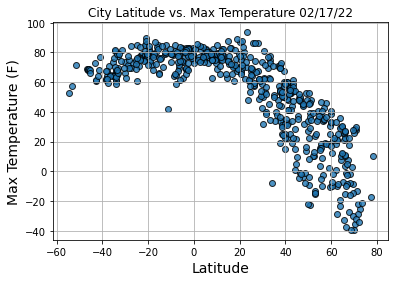

In [24]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)",fontsize =14)
plt.xlabel("Latitude",fontsize = 14)
plt.grid(True)


# Save the figure.
plt.savefig("weather_data/city_lats_vs_max_temps.png")

# Show plot.
plt.show()

In [ ]:
# Build the scatter plot for latitude vs humidity
plt.scatter(lats,
            humidity,
            edgecolors = "black",
            marker = "o",
            alpha = 0.8, label = "Cities"
            
            
            
            
            
            

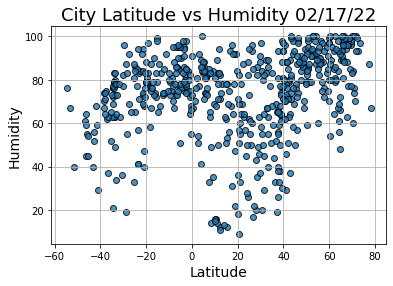

In [31]:
# Build the scatter plot for city latitude vs humidity
plt.scatter(lats,
            humidity,
            edgecolors = "black",
            marker = "o",
            alpha = 0.8, label = "Cities")
plt.title("City Latitude vs Humidity " + time.strftime("%x"),fontsize = 18)
plt.ylabel("Humidity",fontsize = 14)
plt.xlabel("Latitude",fontsize = 14)
plt.grid(True)

# Save the figure
plt.savefig("weather_data/City_Latitude_vs_Humidity.png")

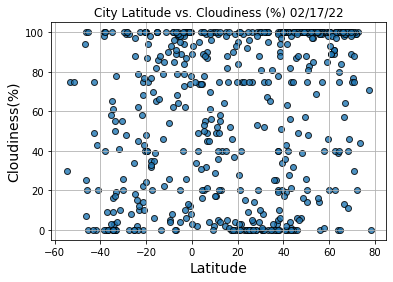

In [33]:
# Make scatter plot compare city latitude vs humidity 
plt.scatter(lats,
            cloudiness,
            edgecolors = "black",
            alpha = 0.8,
            label= "Cities",
            marker = "o")
plt.title("City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.xlabel("Latitude",fontsize = 14)
plt.ylabel("Cloudiness(%)", fontsize = 14)
plt.grid(True)

# Save figure
plt.savefig("weather_data/city_latitude_vs_humidity")

In [ ]:
# Make scatter plot compare city latitude vs wind speed 
plt.scatter(lats,
            wind_speed,
            edgecolors = "black",
            alpha = 0.8,
            label= "Cities",
            marker = "o")
plt.title("City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.xlabel("Latitude",fontsize = 14)
plt.ylabel("Cloudiness(%)", fontsize = 14)
plt.grid(True)

# Save figure
plt.savefig("weather_data/city_latitude_vs_humidity")